In [22]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
df=pd.read_csv('Wine.csv')

In [24]:
df

,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


we can drop id column because it is unuseful

In [25]:
df.drop(columns='Id',inplace=True)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acid,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acid,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorid,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
sum of sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


We see from above graph that we have a lot of difference between 75 % of sum of sulfur dioxide and max value, so there can be outliers we should replace them for better accuracy

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum of sulfur dioxide'>

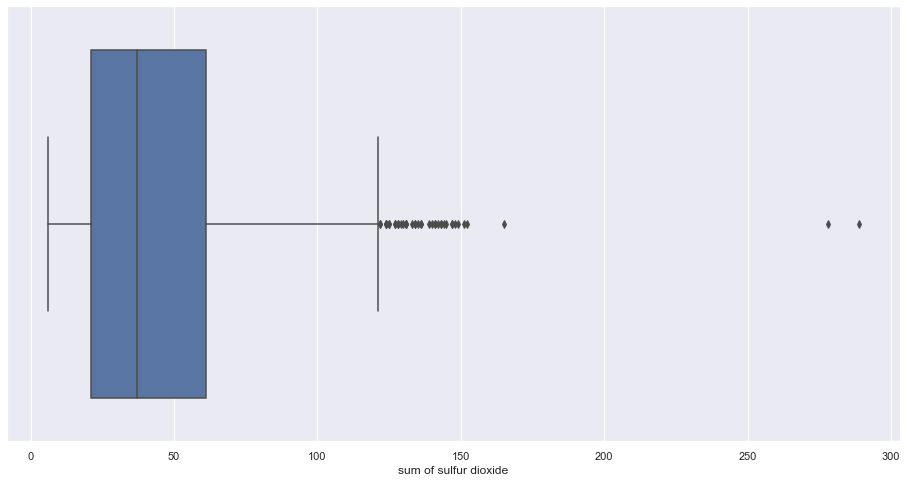

In [27]:
sns.boxplot(df['sum of sulfur dioxide'])

In [28]:
Q1 = df['sum of sulfur dioxide'].quantile(0.25)
Q3 = df['sum of sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1

In [29]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [30]:
(df['sum of sulfur dioxide'] > upper).sum()

40

In [31]:
(df['sum of sulfur dioxide'] < lower).sum()

0

In [32]:
df.loc[(df['sum of sulfur dioxide'] > upper), 'sum of sulfur dioxide'] = upper

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum of sulfur dioxide'>

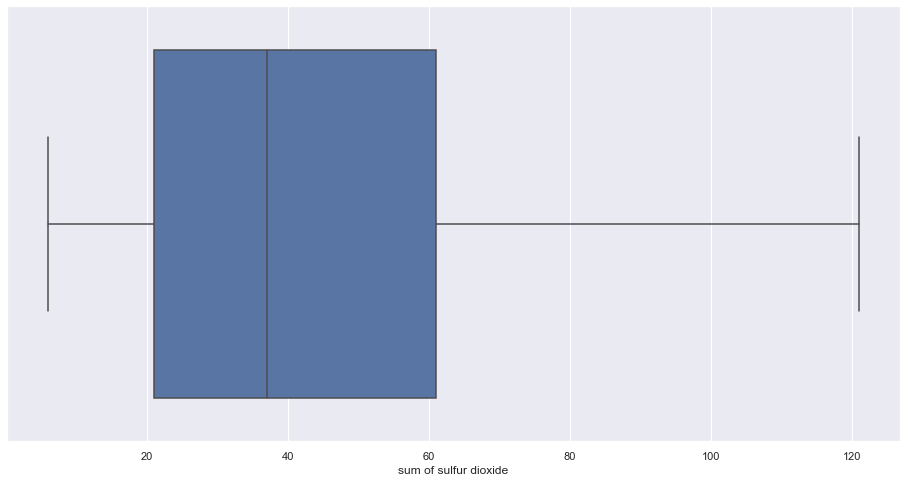

In [33]:
sns.boxplot(df['sum of sulfur dioxide'])

<AxesSubplot:>

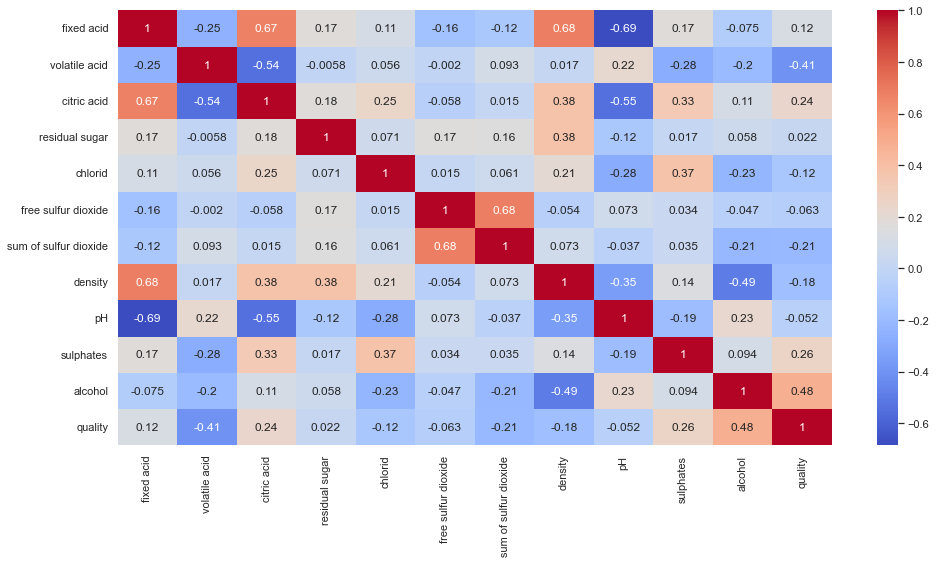

In [34]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [35]:
cor = df.corr()


In [36]:
#Correlation with output variable
cor_target = abs(cor["quality"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

quality    1.0
Name: quality, dtype: float64

In [37]:
df.quality.value_counts()
#we can see that quality is a categoric column. So we need to apply classification algorithm.

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [38]:
X=df.drop(columns='quality')
y=df['quality']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42)

In [40]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)
y_pred = logreg.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[  0   0   0   0   0   0]
 [  0   0   6   3   0   0]
 [  1   0 106  35   1   0]
 [  0   0  47  90   9   0]
 [  0   0   4  22  15   0]
 [  0   0   0   2   2   0]]
0.6151603498542274
